In [ ]:
%load_ext autoreload

In [3]:
import random
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")
    
%autoreload
import build_dataset
import data_statistics

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
appended
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [12]:
%autoreload
import build_dataset
import data_statistics

In [4]:
wt_instance = wt_instance = build_dataset.wt_data.load_instance("WTG02",load_minimal=False)


Loading WTG02...
Loaded WTG02


### Checking signal: 'GbxHssRr;0,0102;m/s2'.  750 Bins. Unfiltered: rpm > 0

In [5]:
signal_name = 'GbxHssRr;0,0102;m/s2'
number_of_intervals = len(wt_instance.ten_second_intervals)
interval = np.arange(number_of_intervals)
frequency_lines = [28,56,84]
horisontal_lines=[0.2]
rpm_lim = 0

df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 
                                                         signal_name, 
                                                         power_threshold=0,
                                                         rpm_threshold=rpm_lim,
                                                         spectrum_type='order',
                                                         get_rms_for_bins=True,
                                                         plot=False, 
                                                         bins=750, 
                                                         plot_bin_lines=False,
                                                         x_lim=None,
                                                         frequency_lines=frequency_lines,
                                                         horisontal_lines=horisontal_lines,
                                                         avg_pwr_values=[],
                                                         interval_range=interval,
                                                         interpolation_method='linear',
                                                         plot_resampling=False)

This is sensor name GbxHssRr;0,0102;m/s2
Type of component registered when building dataset is gearbox.

419 / 425 intervals added to dataframe


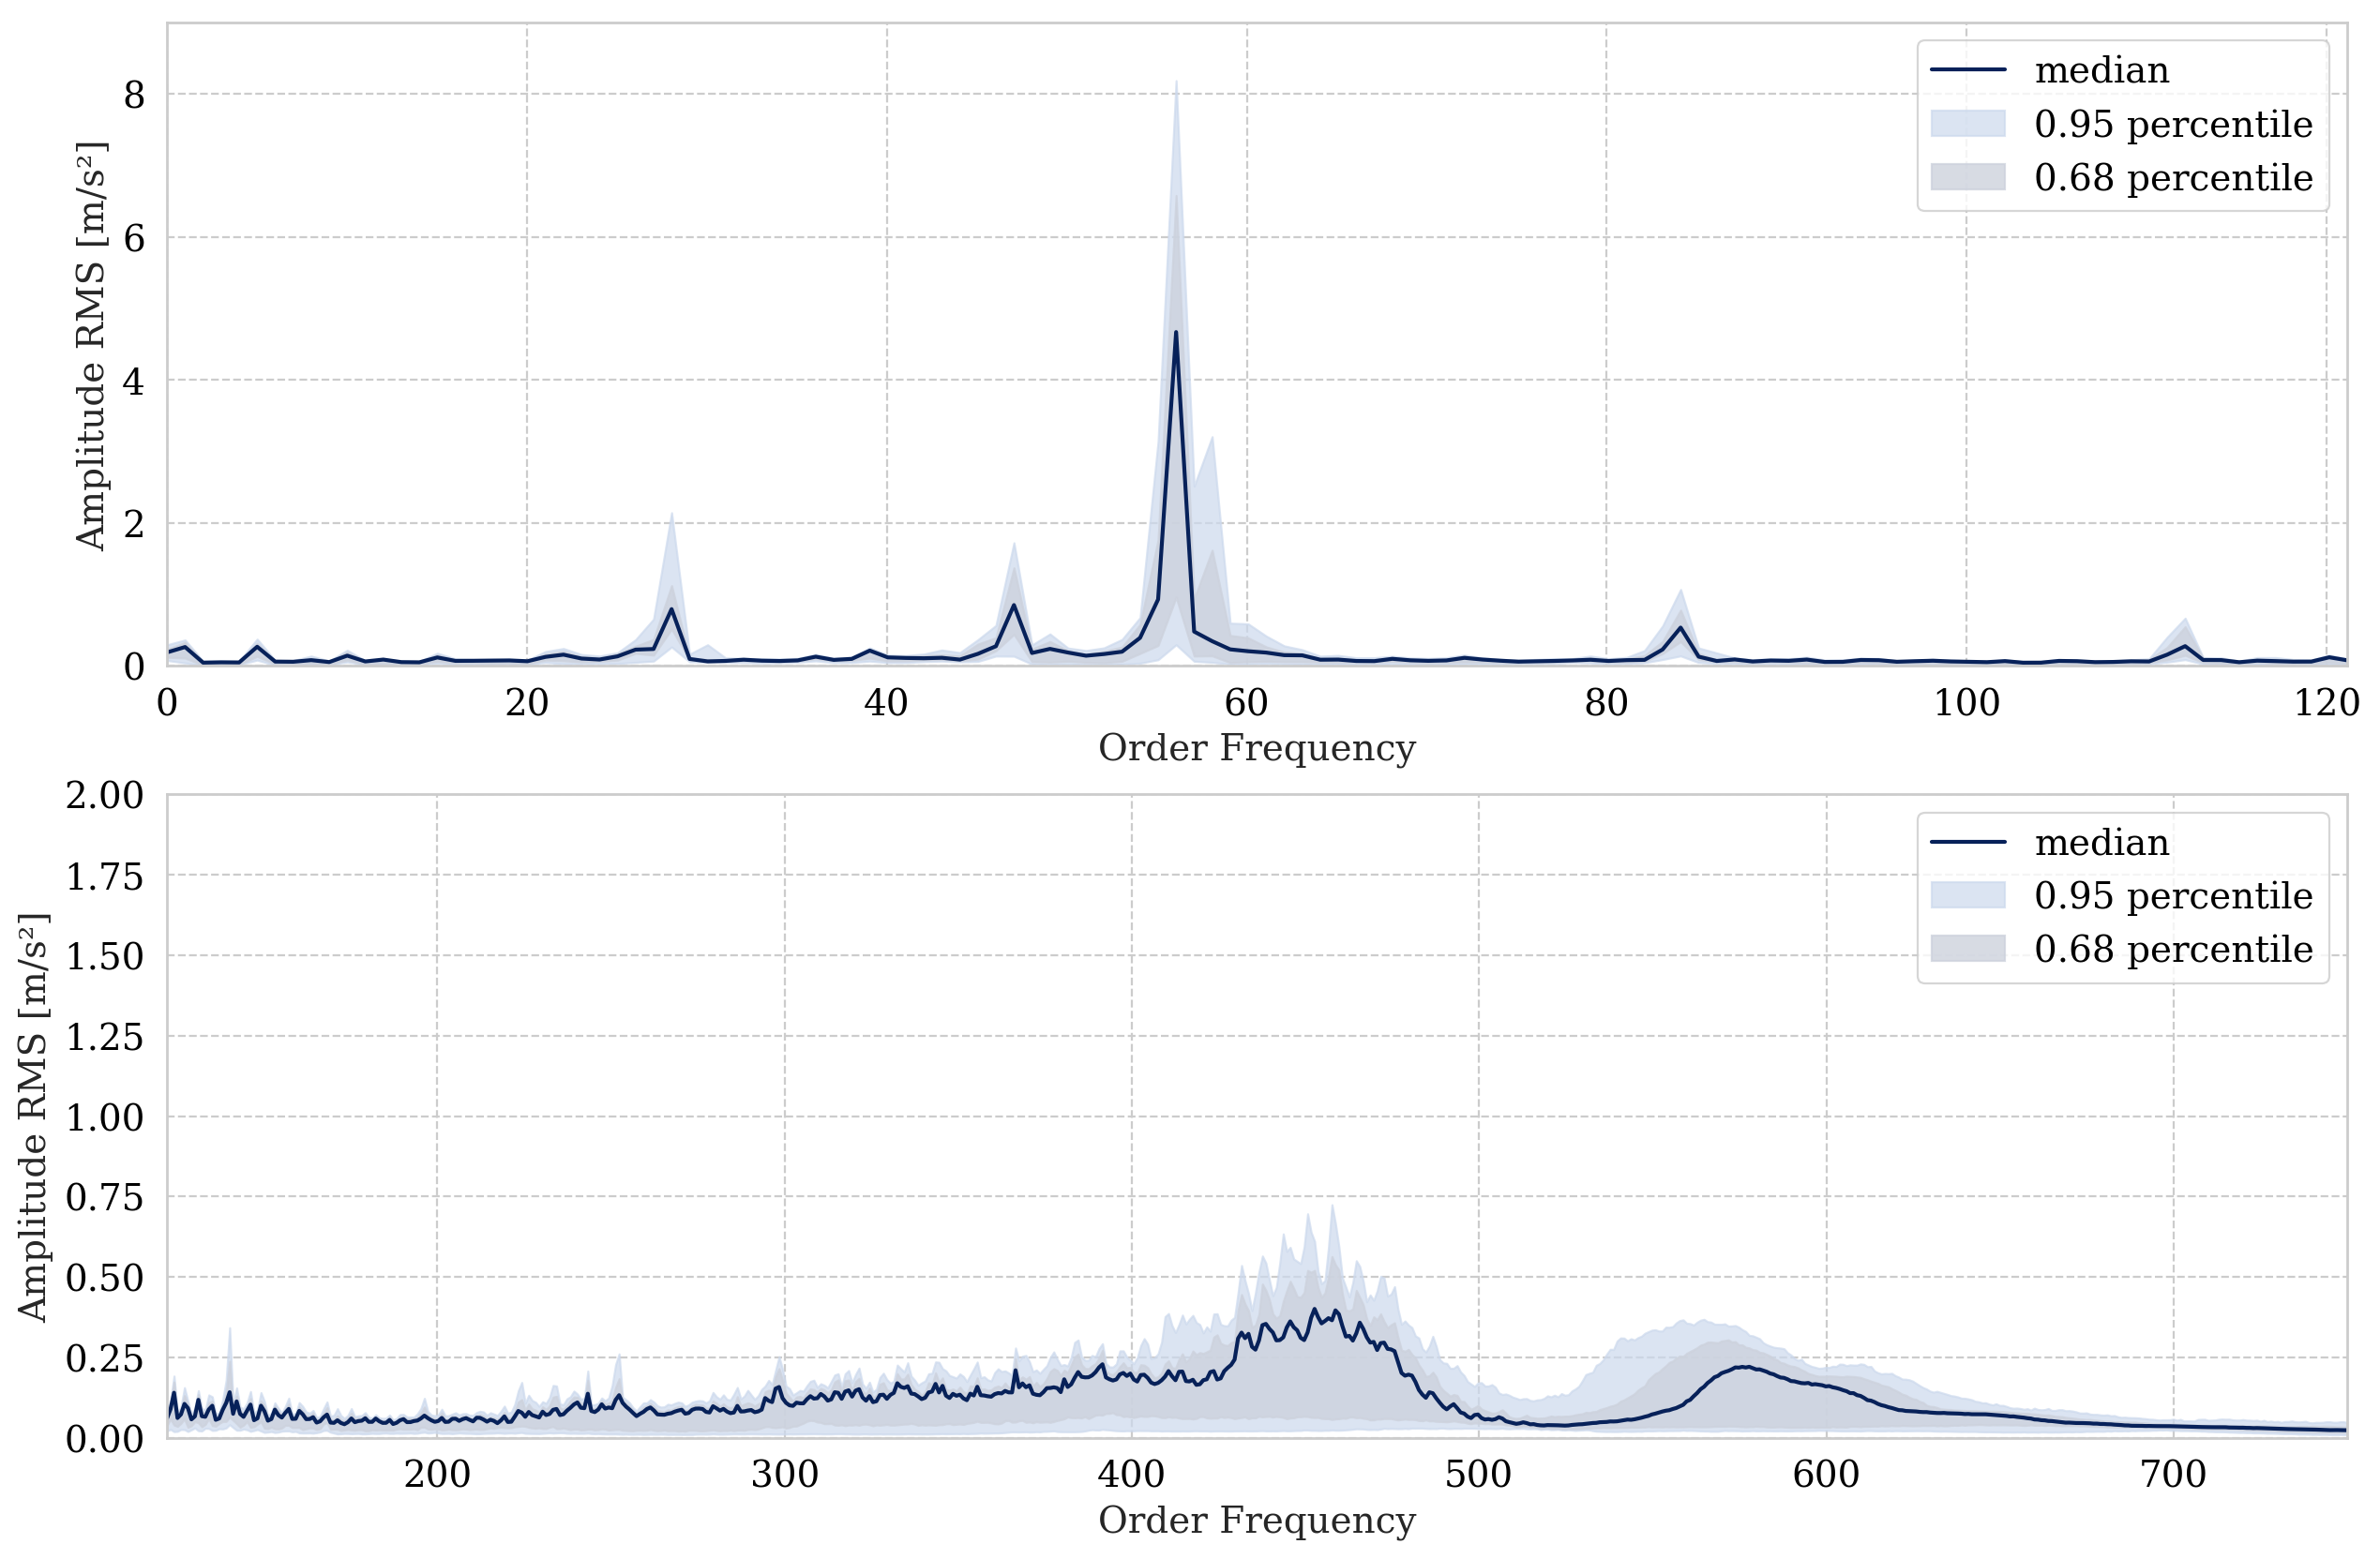

In [15]:
data = df.drop(columns=['AvgPower','ActPower','AvgRotSpeed','WindSpeed','NacelleDirection'])
data_statistics.plot_median_rms(data, split=True, plot_mean=False, y_max=9, y_max2=2)

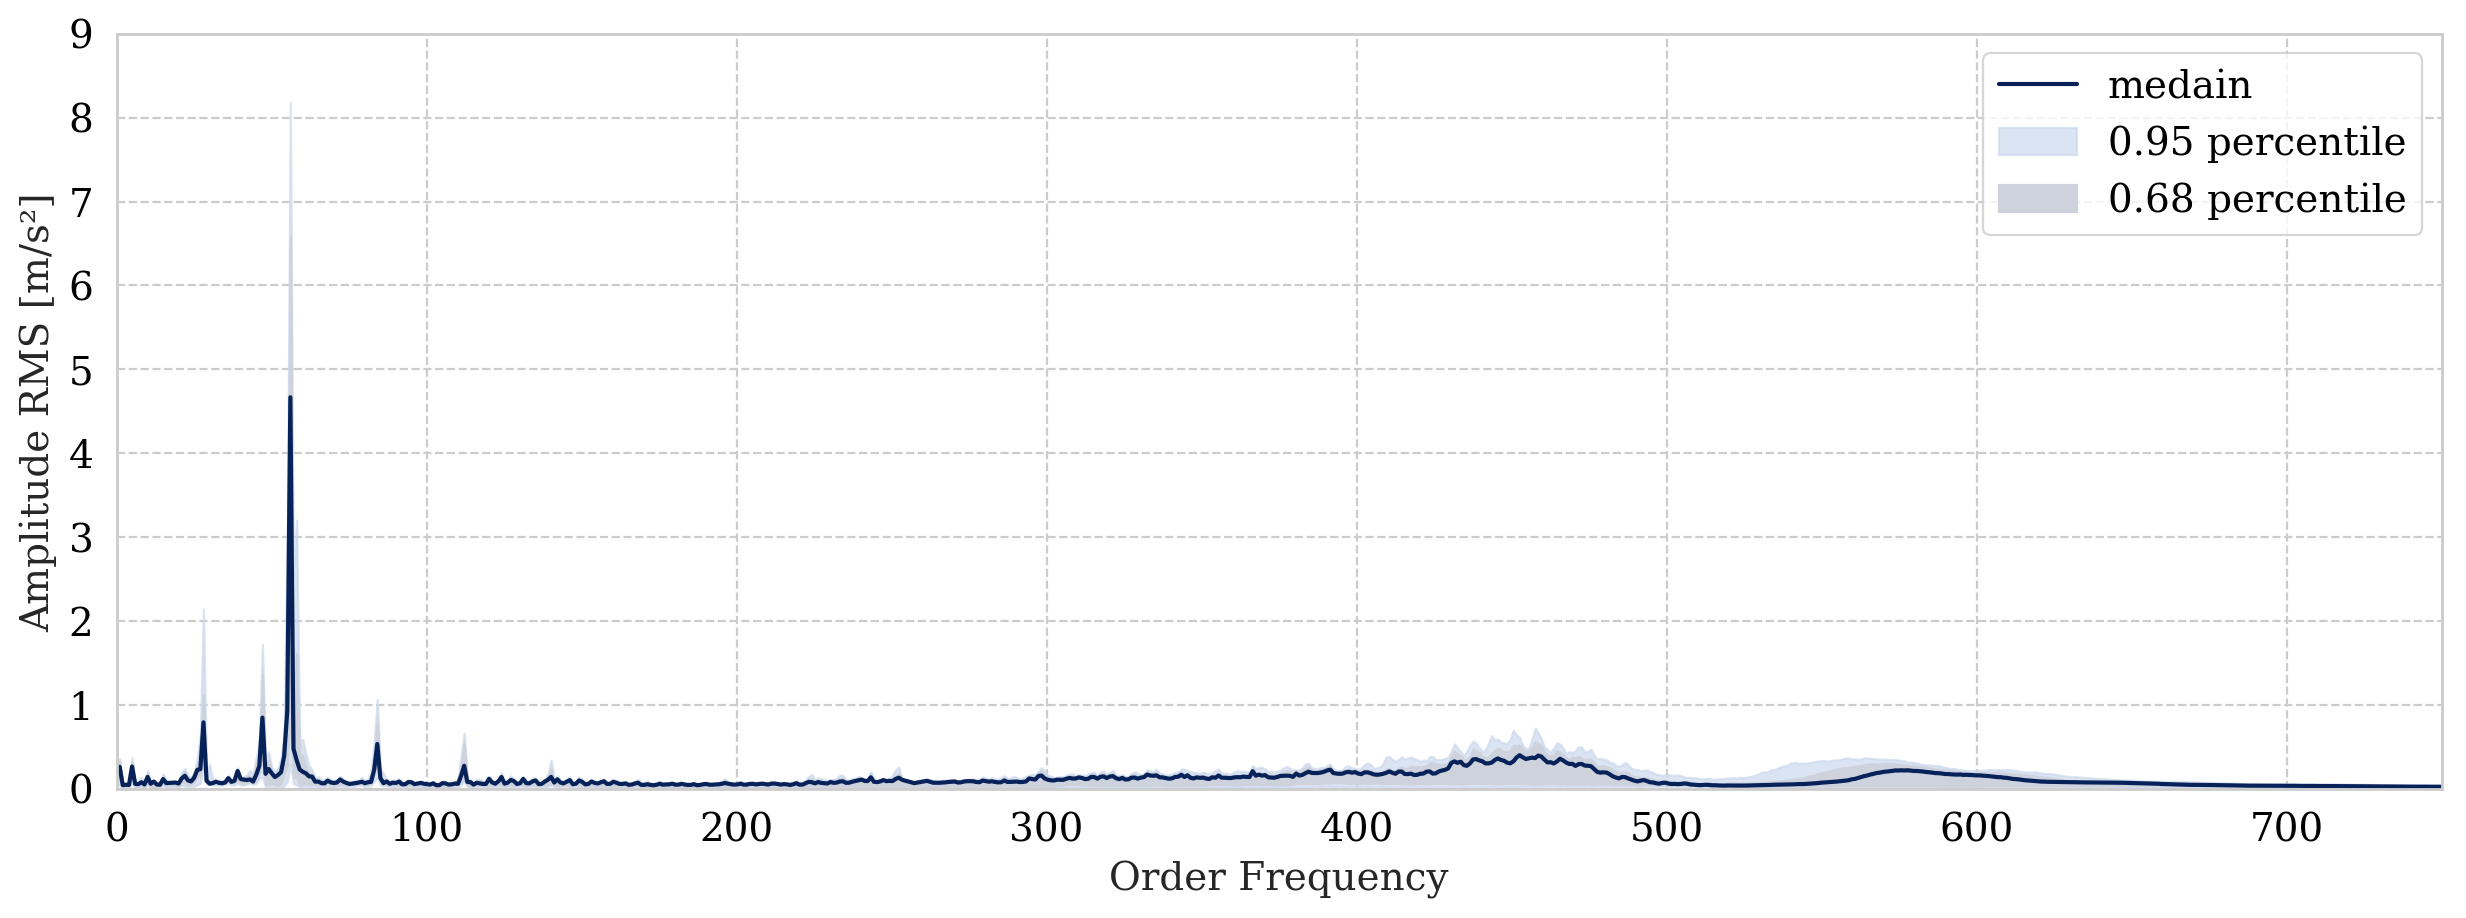

In [13]:
data_statistics.plot_median_rms(data, split=False, plot_mean=False, y_max=9)

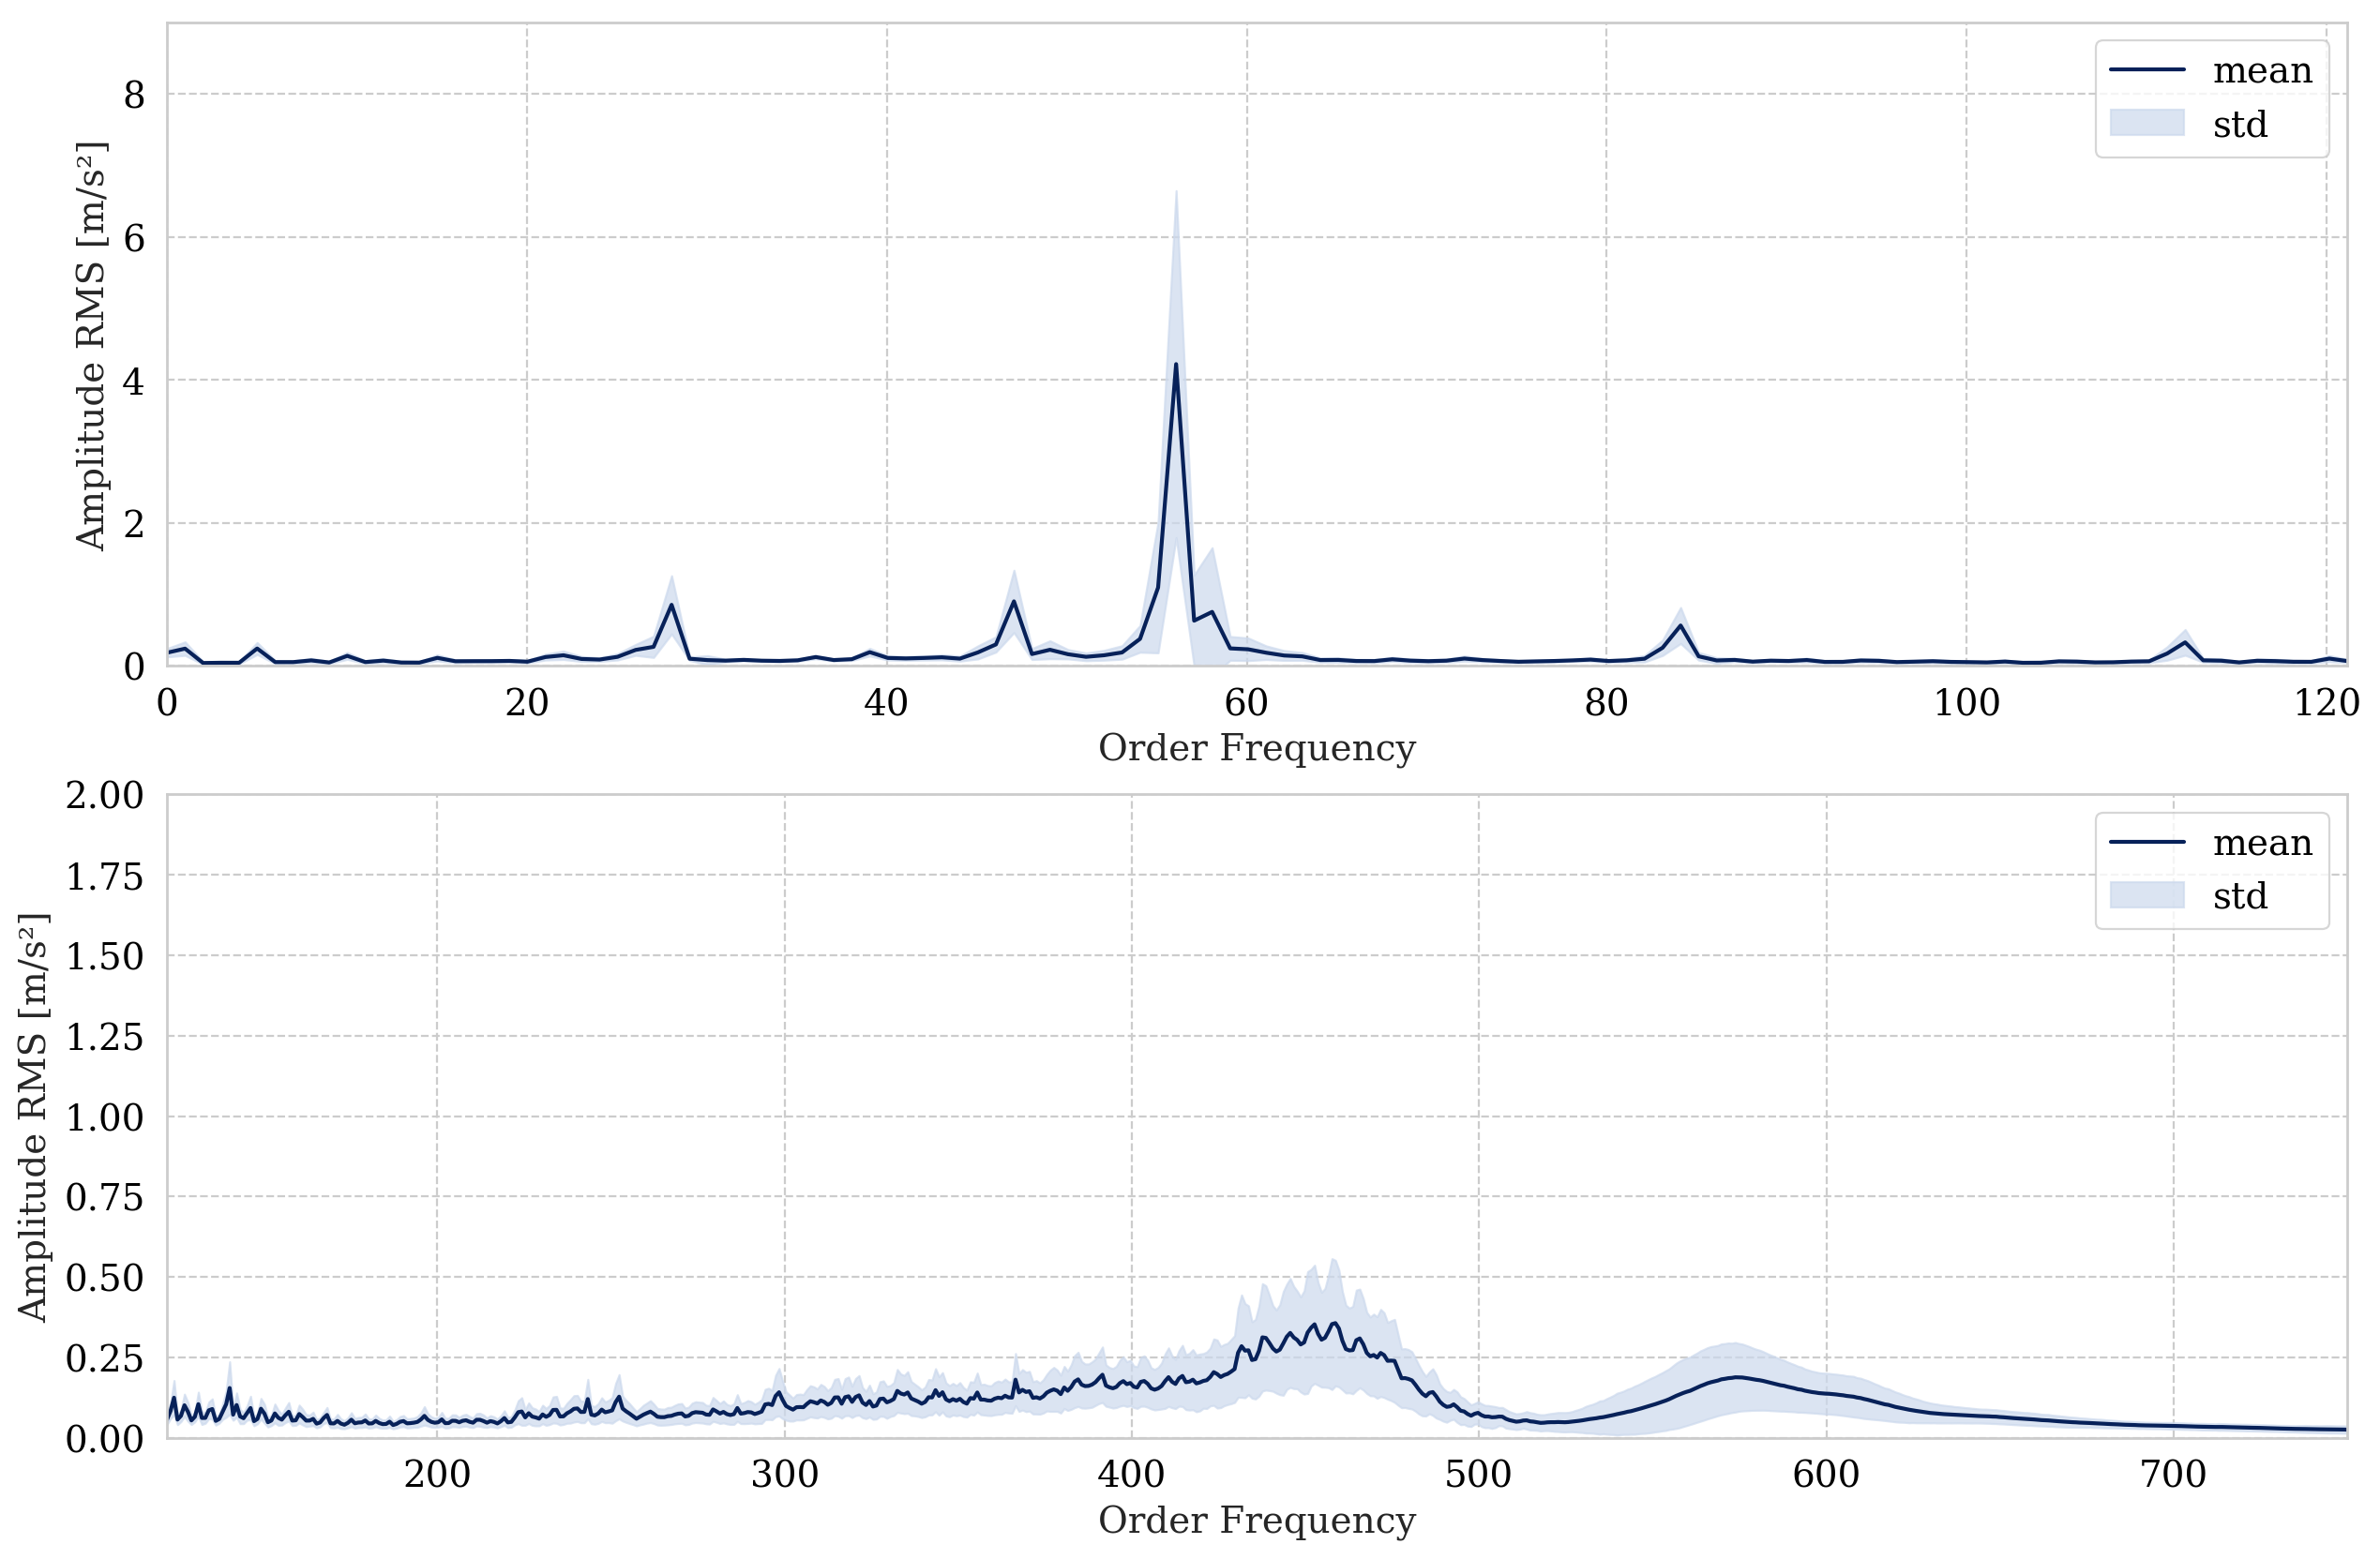

In [16]:
data_statistics.plot_mean_rms(data, split=True, y_max=9, y_max2=2)

### Checking signal: 'GbxHssRr;0,0102;m/s2'.  750 Bins. Filtered: rpm > 1400

In [19]:
df_filtered = df.drop(df[df.AvgRotSpeed < 1400].index)

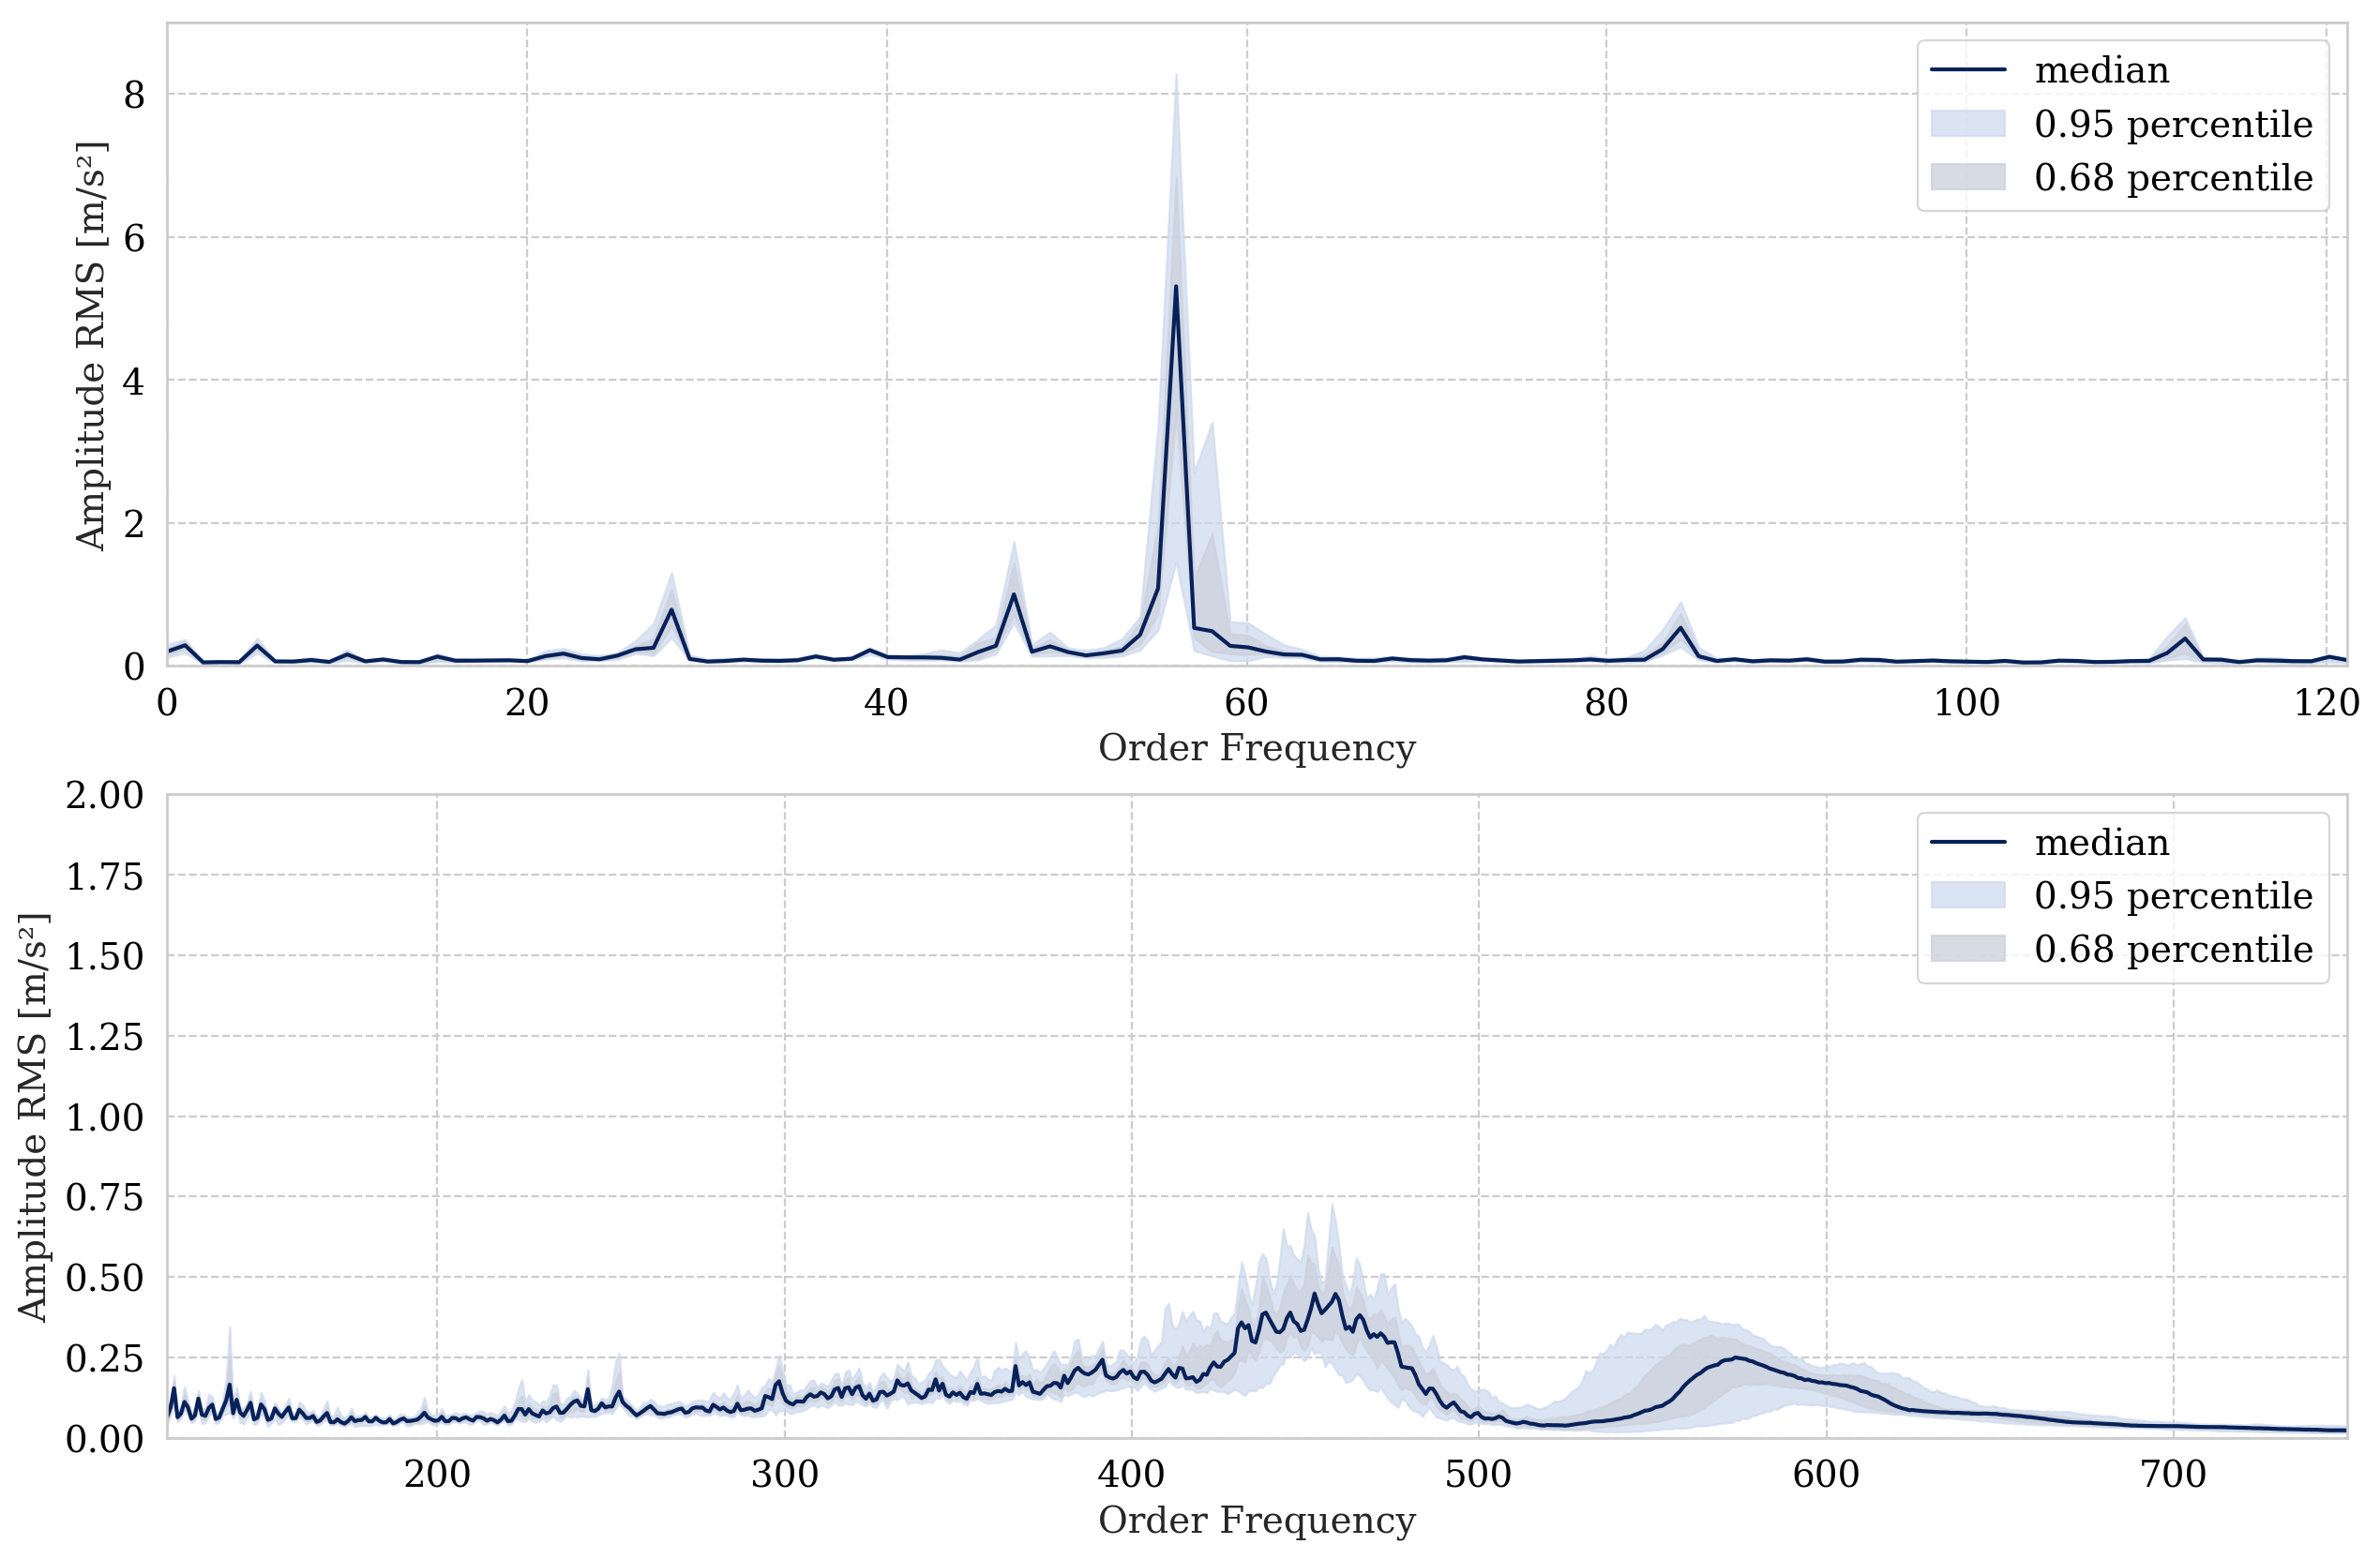

In [20]:
data_filtered = df_filtered.drop(columns=['AvgPower','ActPower','AvgRotSpeed','WindSpeed','NacelleDirection'])
data_statistics.plot_median_rms(data_filtered, split=True, plot_mean=False, y_max=9, y_max2=2)

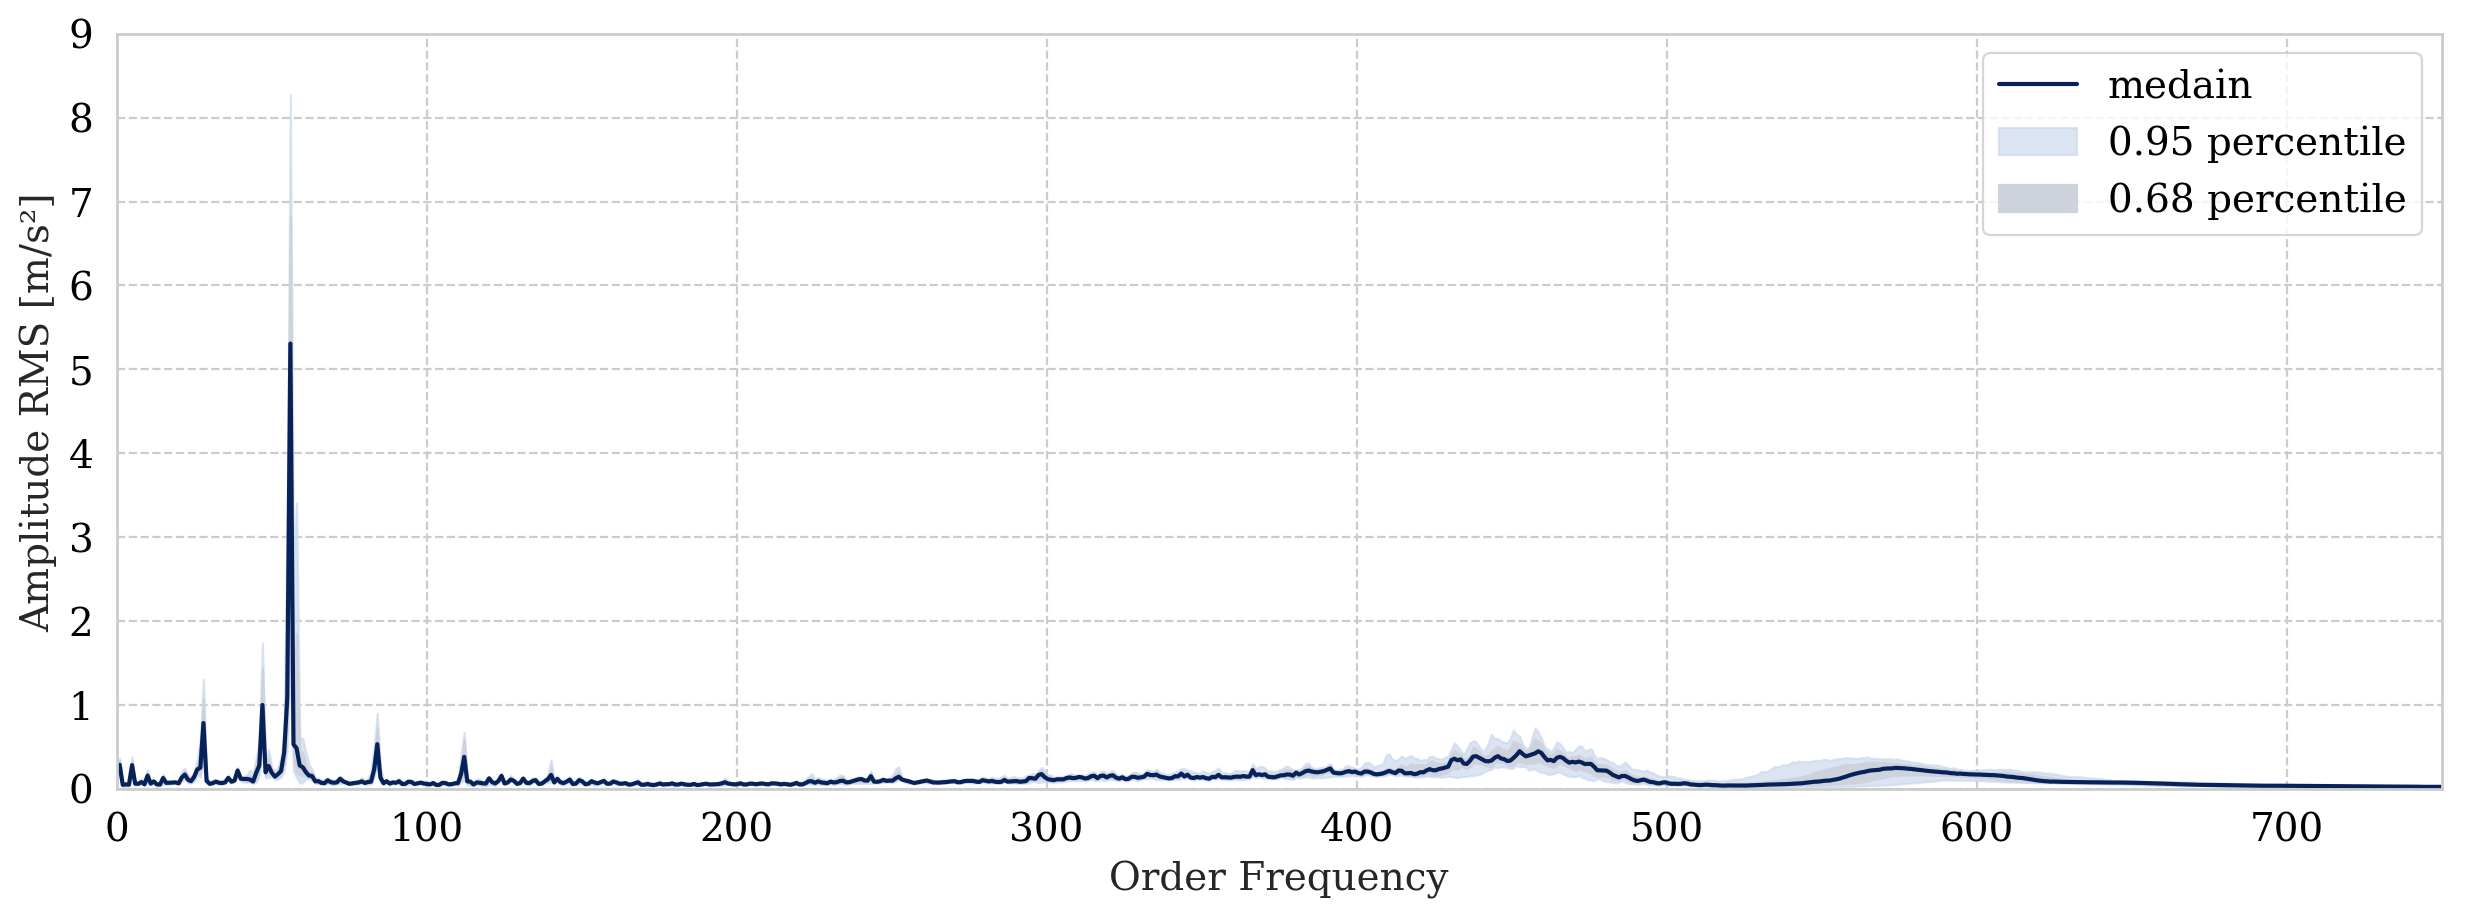

In [22]:
data_statistics.plot_median_rms(data_filtered, split=False, plot_mean=False, y_max=9, y_max2=2)

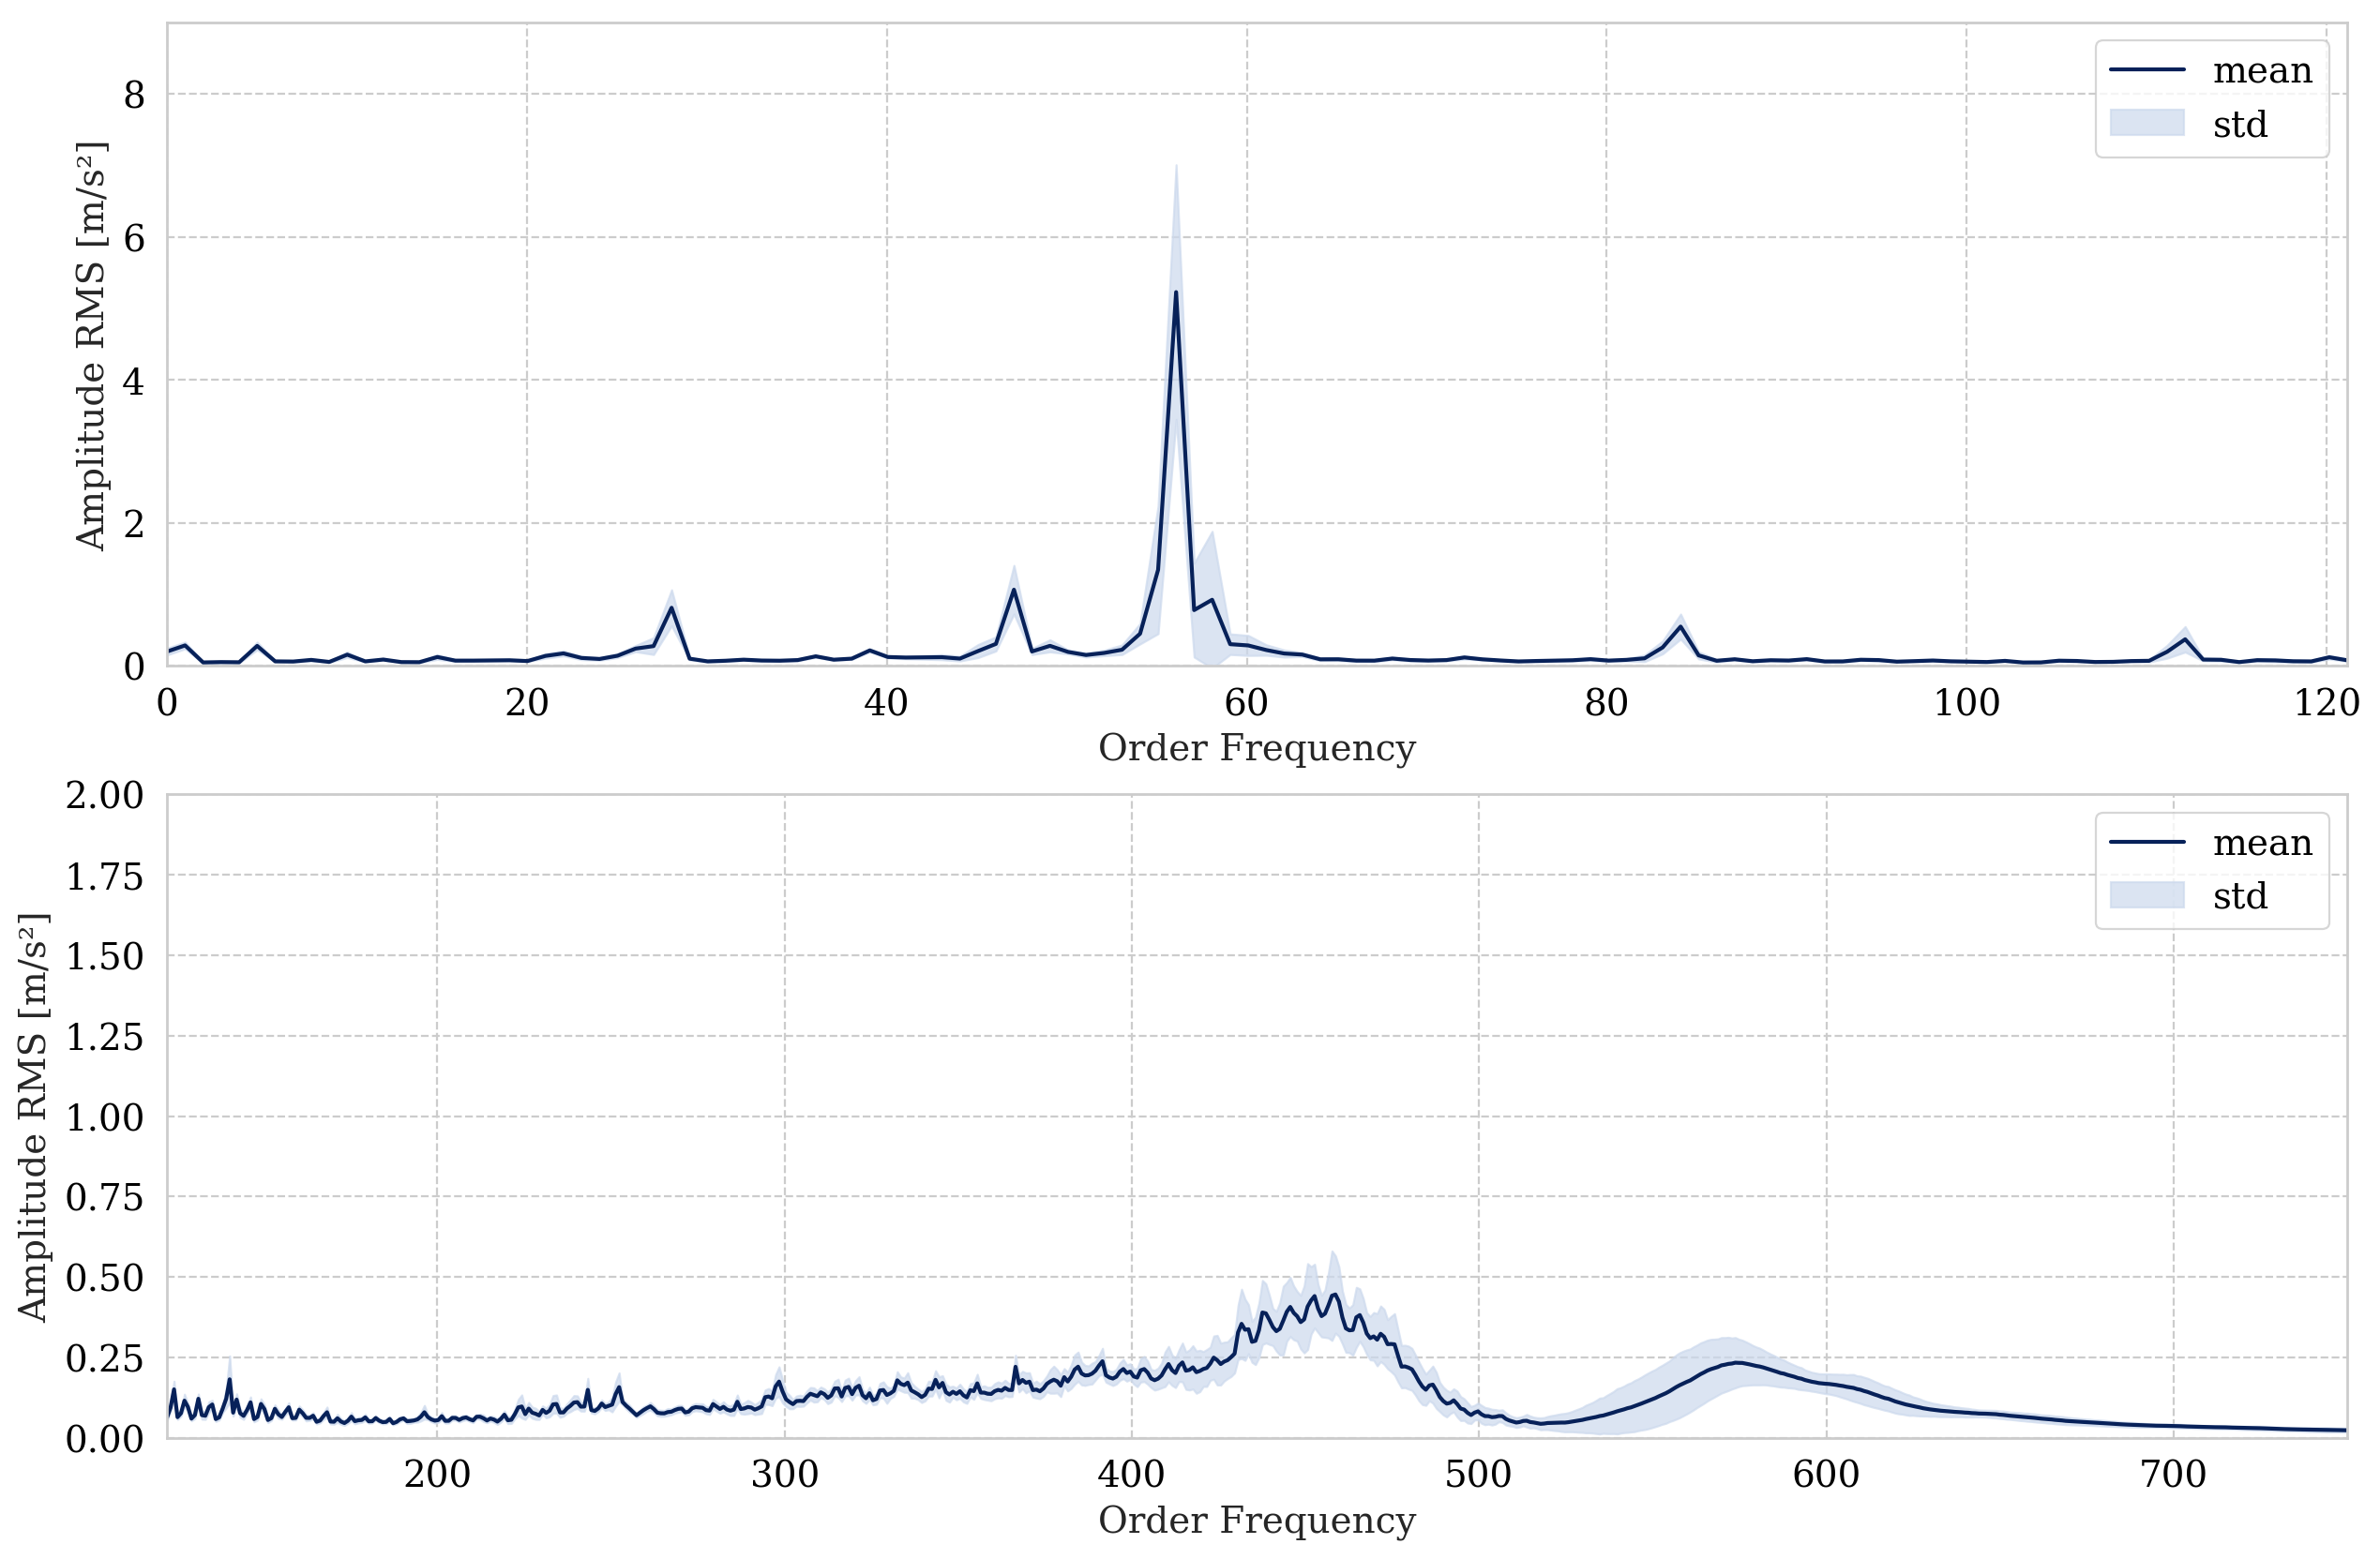

In [23]:
data_statistics.plot_mean_rms(data_filtered, split=True, y_max=9, y_max2=2)

## Unfiltered Data Set

In [26]:
def plot_df(df, x_col_name, y_col_name, ax=None):
    y = df[y_col_name]
    if x_col_name == 'interval':
        x = np.arange(0, len(y))
    else:
        x = df[x_col_name]
    ax = ax or plt.gca()
    ax.scatter(x,y)
    ax.set_xlabel(x_col_name)
    ax.set_ylabel(y_col_name)
    return ax

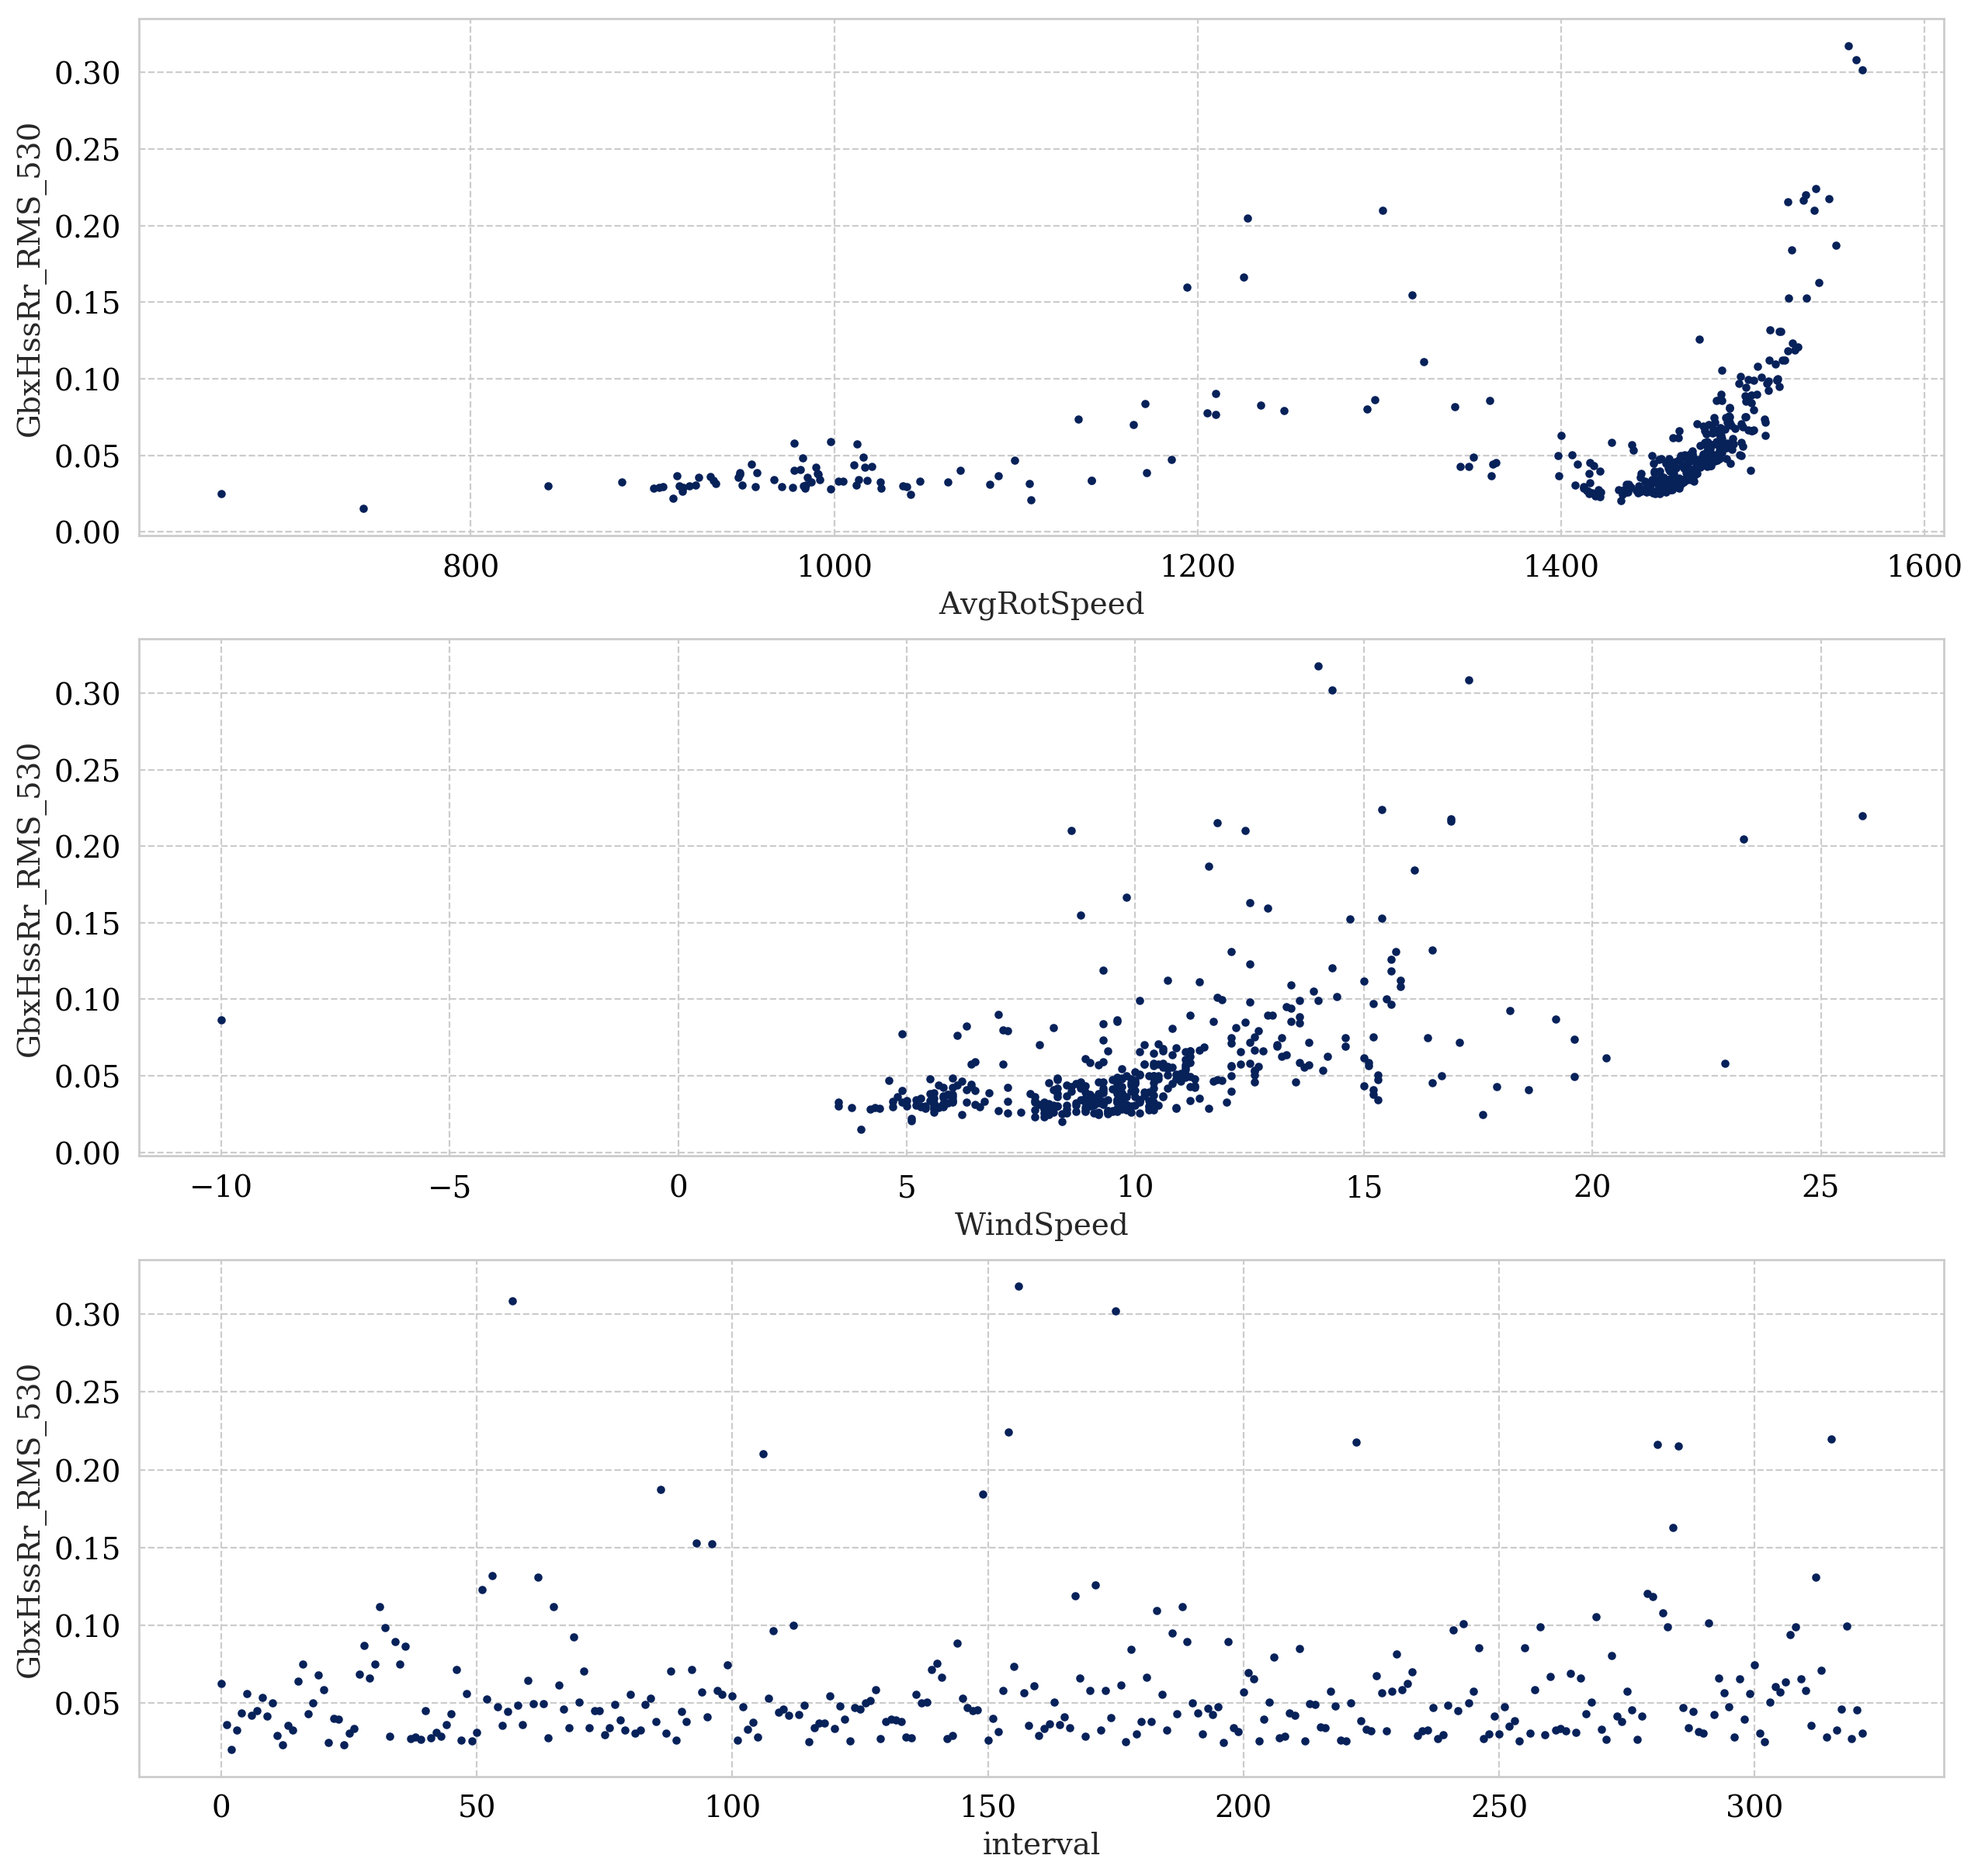

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(15,15), nrows=3)
y_col = 'GbxHssRr_RMS_530'
plot_df(df, 'AvgRotSpeed', y_col, ax=ax1)
plot_df(df, 'WindSpeed', y_col, ax=ax2)
plot_df(df_filtered,'interval', y_col, ax=ax3)

## Filtered Data Set AvgRotSpeed > 1400

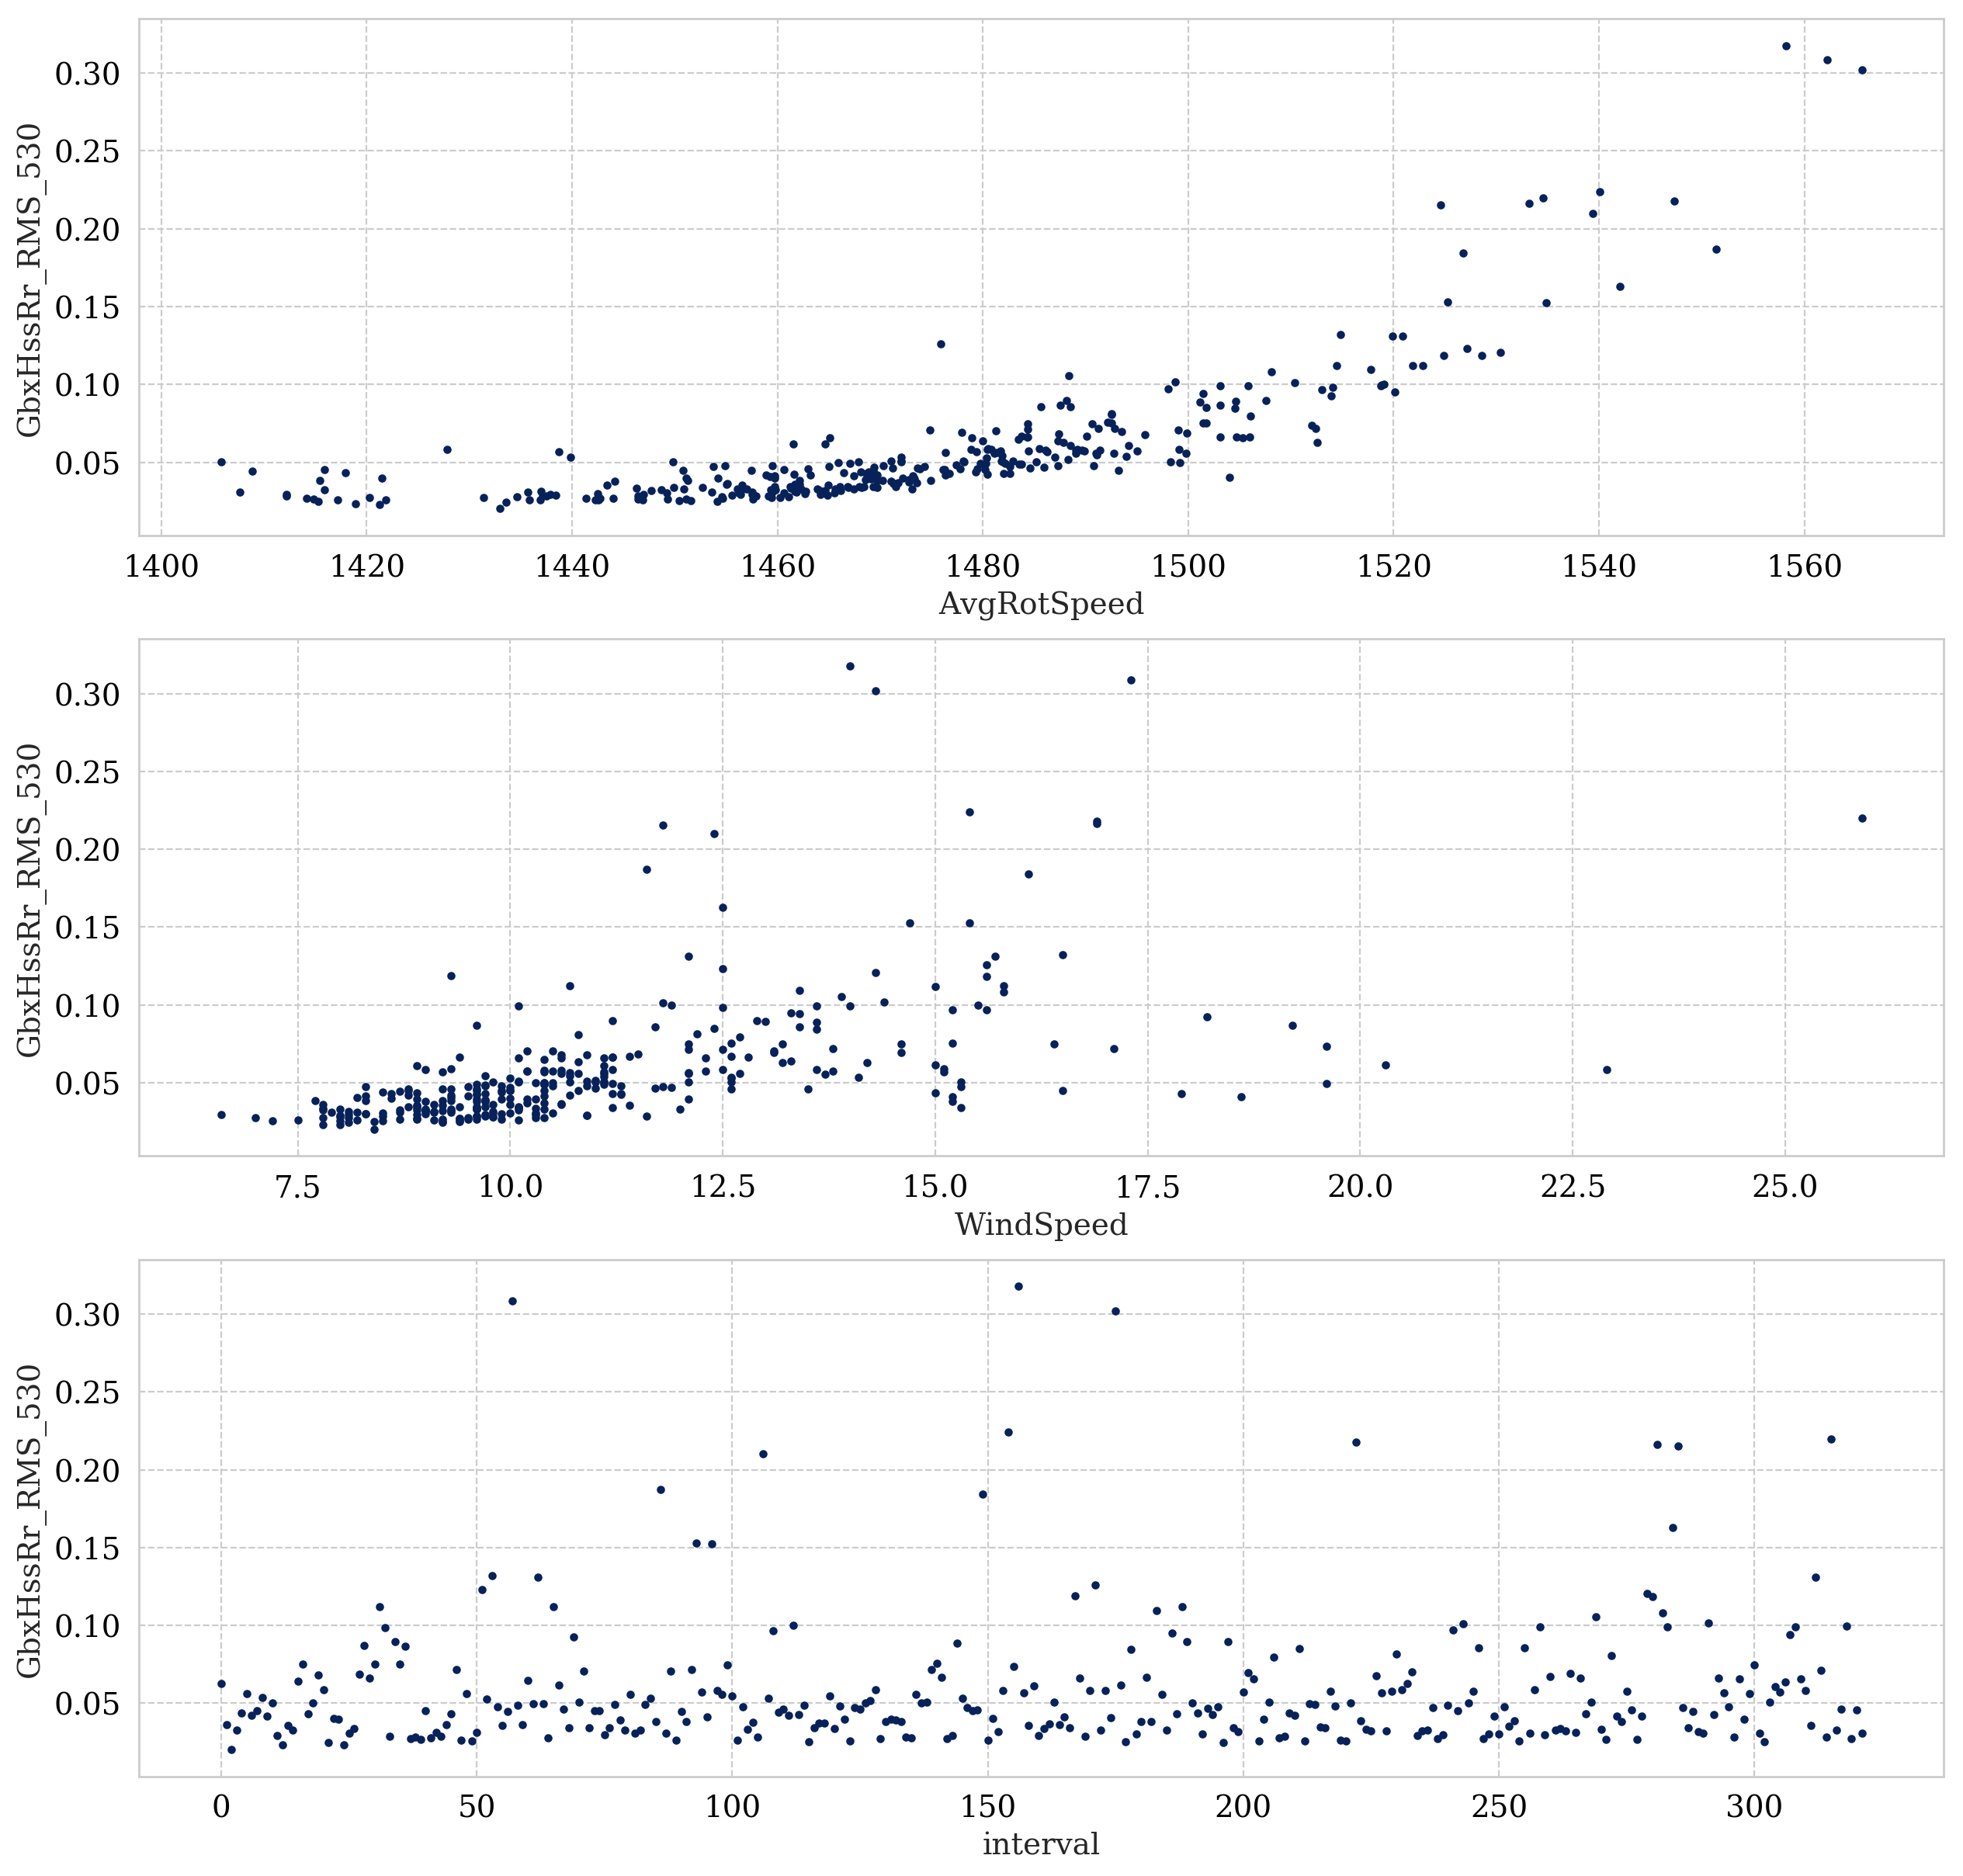

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(15,15), nrows=3)
y_col = 'GbxHssRr_RMS_530'
plot_df(df_filtered,'AvgRotSpeed', y_col, ax=ax1)
plot_df(df_filtered,'WindSpeed', y_col, ax=ax2)
plot_df(df_filtered,'interval', y_col, ax=ax3)
